# Looking at an experiment object

## Set-up

### Imports

In [ ]:
%load_ext autoreload
%autoreload 2
import os  
import sys
import pandas as pd
from amftrack.util.sys import get_dates_datetime, get_dirname, temp_path, get_data_info, update_plate_info, \
get_current_folders, get_folders_by_plate_id, path_code
#import ast
#from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
#import scipy.sparse
from amftrack.pipeline.functions.image_processing.extract_graph import from_sparse_to_graph, generate_nx_graph, sparse_to_doc
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment, Edge,Node, plot_raw_plus
from amftrack.pipeline.paths.directory import run_parallel_transfer, find_state, directory_scratch, directory_project, directory_archive
import dropbox
from amftrack.transfer.functions.transfer import upload, zip_file
from subprocess import call
from tqdm.autonotebook import tqdm
from time import time_ns
import subprocess
import matplotlib as mpl
from random import choice

In [42]:
import os
from amftrack.util.sys import get_current_folders, update_plate_info
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Choosing the folder

In [63]:
directory = r'/data/felix'
update_plate_info(directory)
all_folders = get_current_folders(directory+"/")
len(all_folders)

analysed:   0%|          | 0/5 [00:00<?, ?it/s]

1

In [64]:
folders = all_folders.loc[all_folders['folder']=='20220330_2357_Plate19']
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp
11573,/data/felix/20220330_2357_Plate19,961,19,'Carrot','A5','001P100N100C','Y','-',20220328,25,...,True,False,False,True,True,False,False,"30.03.2022, 23:57:",20220330_2357_Plate19,NaN


## Visualisation

#### Experience object

In [12]:
i = 0

In [13]:
plate = int(list(folders['folder'])[i].split('_')[-1][5:])
folder_list = list(folders['folder'])
directory_name = folder_list[i]

In [14]:
plate

19

In [15]:
directory

'/data/felix/'

In [16]:
exp = Experiment(plate, directory)
exp.load(folders.loc[folders['folder']==directory_name],labeled=False)

2022-03-30 23:57:00


In [17]:
folders.loc[folders['folder']==directory_name]

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp
11573,/data/felix/20220330_2357_Plate19,961,19,'Carrot','A5','001P100N100C','Y','-',20220328,25,...,True,False,False,True,True,False,False,"30.03.2022, 23:57:",20220330_2357_Plate19,NaN


#### Selecting a timestep

In [ ]:
(G, pos) = exp.nx_graph[0],exp.positions[0]

In [ ]:
type(G)

In [ ]:
len(G.edges)

In [ ]:
len(G.nodes)

In [ ]:
edge = choice(list(G.edges))

In [ ]:
edge_exp = Edge(Node(edge[0],exp),Node(edge[1],exp),exp)

### Visualizing a node

In [ ]:
edge_exp.begin.show_source_image(0,0)
edge_exp.end.show_source_image(0,0)

In [50]:
edge_exp.orientation_begin(0)

78.11134196037202

In [51]:
edge_exp.orientation_end(0)

81.46923439005188

In [52]:
dir(Edge)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'is_in',
 'orientation_begin',
 'orientation_end',
 'orientation_whole',
 'pixel_list',
 'ts',
 'width']

In [53]:
edge_exp.pixel_list(0)

[(9721, 25349),
 (9721, 25350),
 (9721, 25351),
 (9720, 25352),
 (9720, 25353),
 (9720, 25354),
 (9720, 25355),
 (9720, 25356),
 (9720, 25357),
 (9720, 25358),
 (9719, 25359),
 (9719, 25360),
 (9719, 25361),
 (9719, 25362),
 (9719, 25363),
 (9718, 25363),
 (9718, 25364),
 (9718, 25365),
 (9718, 25366),
 (9718, 25367),
 (9717, 25368),
 (9717, 25369),
 (9717, 25370),
 (9717, 25371),
 (9717, 25372),
 (9716, 25373),
 (9716, 25374),
 (9716, 25375),
 (9716, 25376),
 (9716, 25377),
 (9715, 25378),
 (9715, 25379),
 (9715, 25380),
 (9715, 25381),
 (9715, 25382),
 (9714, 25383),
 (9714, 25384),
 (9714, 25385),
 (9714, 25386),
 (9714, 25387),
 (9713, 25388),
 (9713, 25389),
 (9713, 25390),
 (9713, 25391),
 (9712, 25392),
 (9712, 25393),
 (9712, 25394),
 (9712, 25395),
 (9712, 25396),
 (9712, 25397),
 (9711, 25398),
 (9711, 25399),
 (9711, 25400),
 (9710, 25401),
 (9710, 25402),
 (9710, 25403),
 (9710, 25404),
 (9709, 25405),
 (9709, 25406),
 (9709, 25407),
 (9709, 25408),
 (9709, 25409),
 (9708, 

[autoreload of amftrack.util.aliases failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 848, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/ipausers/kahane/Wks/AMFtrack/amftrack/util/aliases.py", line 7, in <module>
    coord = Tuple(float, float)
  File "/usr/lib/python3.8/typing.py", line 727, in __call__
    raise TypeError(f"Type {self._name} cannot be instantiated; "
TypeError: Type Tuple cannot be instantiated; use tuple() instead
]
[aut

TypeError: '>=' not supported between instances of 'float' and 'NoneType'

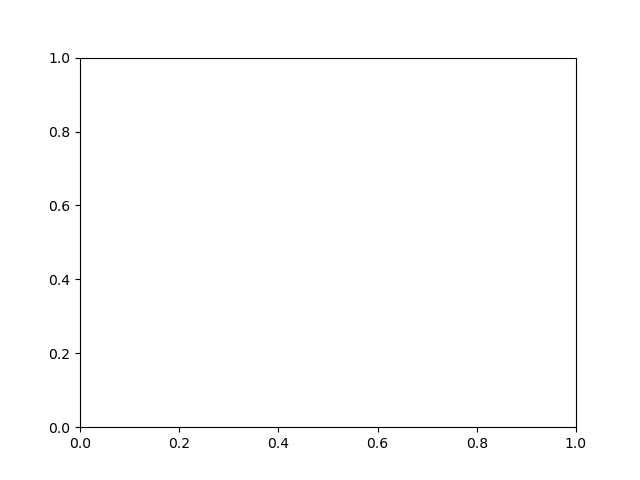

In [56]:
plot_raw_plus(exp,0,[edge_exp.begin.label,edge_exp.end.label])